In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz


df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\BlackBucks\train.csv")
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

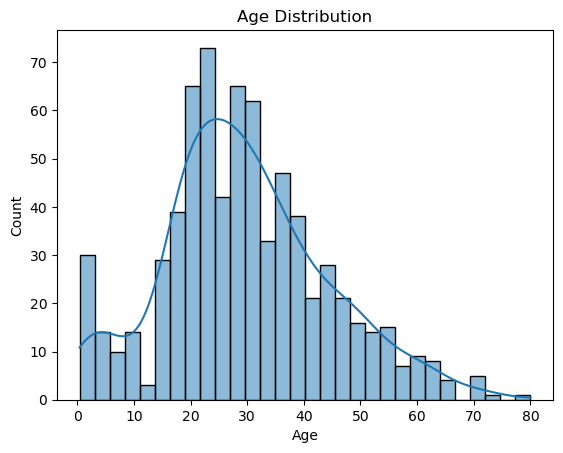

In [46]:
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

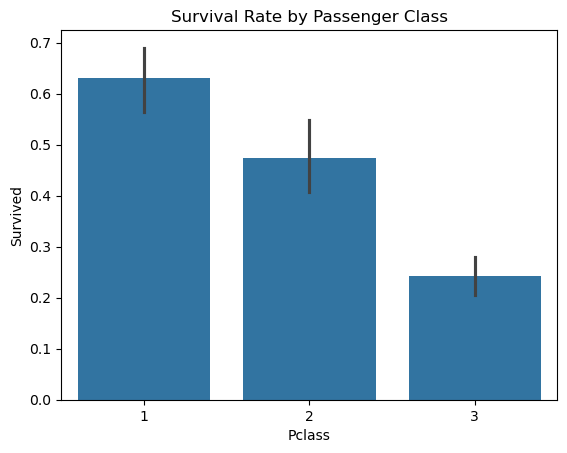

In [48]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

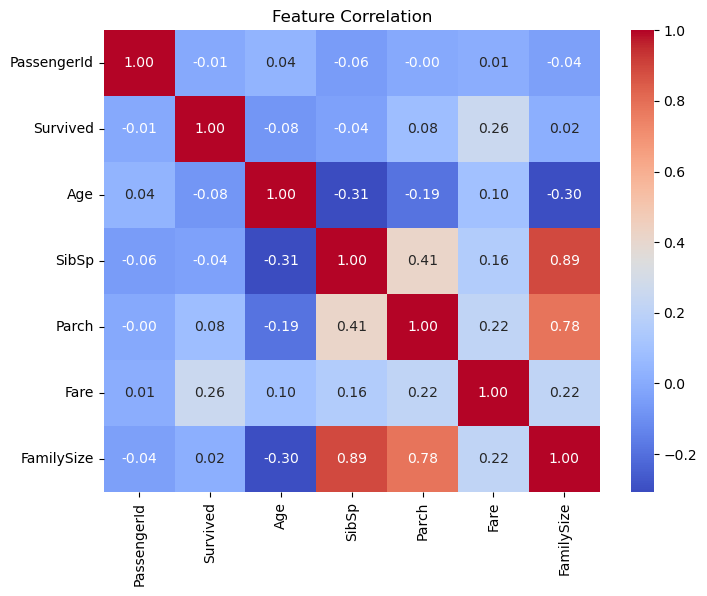

In [50]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 60, 100], labels=["Child", "Teen", "Adult", "Senior"])
df["FamilySizeGroup"] = pd.cut(df["FamilySize"], bins=[0, 1, 4, 10], labels=["Single", "Small Family", "Large Family"])

df_encoded = df.copy()


df_encoded = pd.get_dummies(df_encoded, columns=["Sex", "Embarked", "Pclass", "AgeGroup", "FamilySizeGroup"], drop_first=True)


numeric_df = df_encoded.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()




In [52]:
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_age_map = df.groupby("Title")["Age"].median()
df["Age"] = df["Age"].fillna(df["Title"].map(title_age_map))

df["Fare"] = df.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df.drop(columns=["Cabin", "Name", "Ticket"], inplace=True)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 60, 100], labels=["Child", "Teen", "Adult", "Senior"])
df["FamilySizeGroup"] = pd.cut(df["FamilySize"], bins=[0, 1, 4, 10], labels=["Single", "Small Family", "Large Family"])

df = pd.get_dummies(df, columns=["Sex", "Embarked", "Pclass", "FamilySizeGroup", "AgeGroup", "Title"], drop_first=True)

X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.83


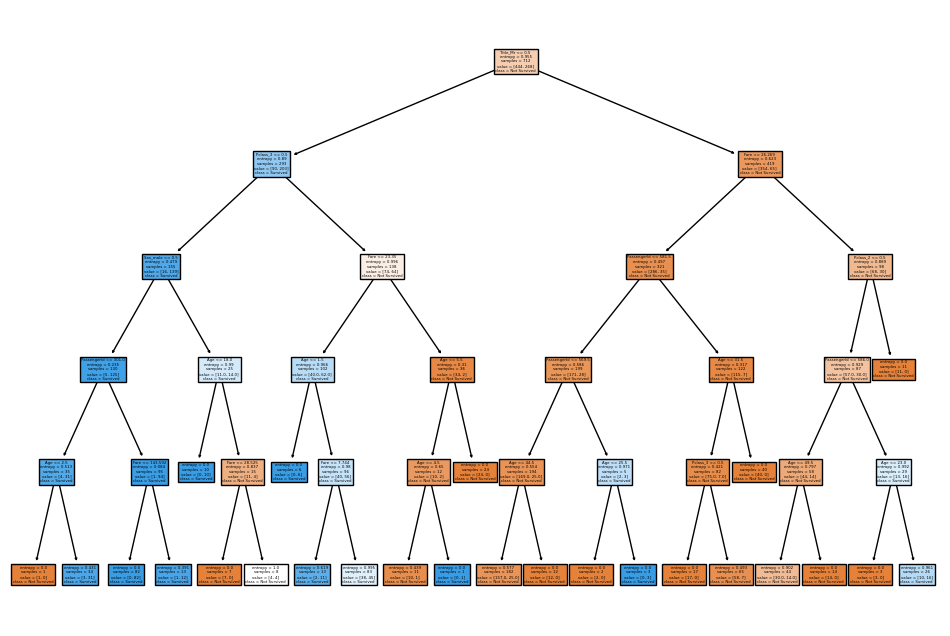

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()
